In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "./input/earthquake_data/"

In [3]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 2 입니다 '

In [4]:
data_list = os.listdir(PATH)
data_list

['3333940_0.dat', '3334089_0.dat']

In [5]:
path = PATH + data_list[1] 
path
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )

In [6]:
signals = data_df.copy()
signals = signals.drop('time',axis=1)
signals.head(5)

,_x,_y,_z
0,3.371620e-08,-7.718999e-08,3.106973e-09
1,3.202158e-08,-6.751933e-08,2.412234e-08
2,5.391698e-08,-4.778630e-08,2.974502e-08
3,4.776981e-08,-6.607367e-08,2.880523e-08
4,4.532062e-08,-5.082458e-08,3.259496e-08


In [14]:
signals.shape

(16138, 3)

In [15]:
fs = 40
x =  signals['_x'][0:7200]
nperseg = 50
noverlap = 25
mode = complex

In [16]:
x

0       3.371620e-08
1       3.202158e-08
2       5.391698e-08
3       4.776981e-08
4       4.532062e-08
            ...     
7195    9.722087e-08
7196    9.338013e-08
7197    1.140364e-07
7198    9.697041e-08
7199    6.107970e-08
Name: _x, Length: 7200, dtype: float64

In [17]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [18]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 50,
                              noverlap = 25)
#f, t, Sxx = signal.spectrogram(x, fs)

<function matplotlib.pyplot.show(*args, **kw)>

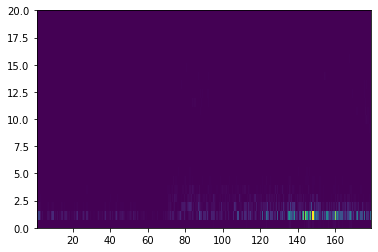

In [19]:
plt.pcolormesh(t, f, Sxx)
plt.show

In [20]:
Sxx.shape

(26, 287)

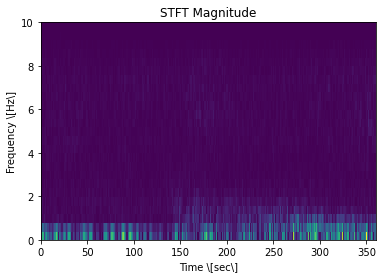

In [14]:
f, t, Zxx = signal.stft(x, fs, nperseg = 50,
                              noverlap = 25)  
plt.pcolormesh(t, f, np.abs(Zxx))  
plt.title('STFT Magnitude')  
plt.ylabel('Frequency \[Hz\]')  
plt.xlabel('Time \[sec\]')  
plt.show()

## 히스토그램 기반 주파수 특징 추출

In [15]:
TimeArray = Sxx[0]
for i in range(1, Sxx.shape[0]):
    TimeArray += Sxx[i]  
print(TimeArray.shape)

(287,)


In [16]:
FrequencyArray = Sxx[:,0]
for i in range(1, Sxx.shape[0]):
    FrequencyArray += Sxx[:,i]  
print(FrequencyArray.shape)

(26,)


(array([24.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([1.27785817e-10, 4.55166613e-07, 9.10205439e-07, 1.36524427e-06,
        1.82028309e-06, 2.27532192e-06, 2.73036075e-06, 3.18539957e-06,
        3.64043840e-06, 4.09547723e-06, 4.55051605e-06]),
 <a list of 10 Patch objects>)

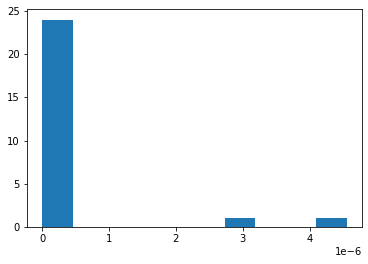

In [27]:
plt.hist(FrequencyArray)

In [21]:
print(len(f))
print(len(FrequencyArray))

26
26


In [17]:
TimeFrequencyArray = np.concatenate((TimeArray,FrequencyArray))
print(TimeFrequencyArray)
print(TimeFrequencyArray.shape)

[4.55051605e-14 9.06749315e-16 7.73456992e-15 2.64199191e-15
 5.13682460e-16 1.29497648e-15 4.83243016e-16 3.56211227e-16
 3.45092666e-16 1.77077682e-15 1.89895464e-15 1.45630443e-15
 6.33356315e-16 3.41851876e-15 4.87140110e-15 7.00840418e-16
 9.27570834e-16 5.35332667e-16 1.32913577e-15 6.25432141e-16
 1.15126833e-15 2.52203906e-15 2.76678503e-15 5.84477215e-16
 2.14947667e-15 2.56036270e-15 1.26987255e-15 8.17260273e-16
 1.03716337e-15 5.62102465e-16 8.83645060e-16 8.25346808e-16
 1.74788711e-15 9.47159456e-16 2.74982406e-15 4.57575719e-15
 6.91129922e-16 6.48007424e-16 4.70232922e-16 1.42856423e-15
 2.99361278e-15 1.34277876e-15 5.71533427e-16 2.84047173e-15
 1.01879138e-15 3.96174245e-16 6.26952442e-16 5.29870686e-16
 4.10288528e-16 5.27935854e-16 4.42692315e-16 2.96336742e-16
 5.90357359e-16 1.57297166e-15 7.27751420e-16 6.92812912e-16
 9.41152192e-16 3.97358338e-16 1.56164808e-15 3.24017408e-15
 6.11485738e-16 6.73272771e-16 1.07067603e-15 1.82264713e-15
 3.79001328e-16 1.470604